# Problem 1:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def load_csv(path):
    data = pd.read_csv(path, names = ['userId', 'movieId', 'rating', 'timestamp'], header = 0)
    
    # generate rating_matrix as R, transform it into a Numpy Array
    R = data.pivot_table(index = ['userId'], columns = ['movieId'], values = 'rating', fill_value = 0).values
    return R, data

path = 'ml-latest-small/ratings.csv'
R, data = load_csv(path)
print (type(R))
print (R.shape)

total_users, total_movies = R.shape
total_valid_ratings = np.count_nonzero(R)
num_possible_ratings = total_users * total_movies

sparsity = total_valid_ratings / num_possible_ratings

print ('sparsity = ' + str(sparsity))

<class 'numpy.ndarray'>
(671, 9066)
sparsity = 0.016439141608663475


# Problem 2:

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]
[5983282    1101    3326    1687    7271    4449   20064   10538   28750
    7723   15095]


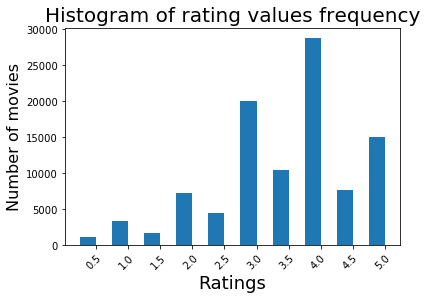

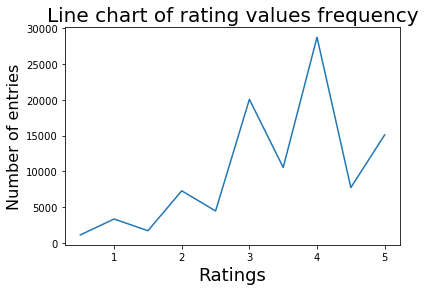

In [2]:
values, counts = np.unique(R, return_counts=True)
dict(zip(values, counts))

print(values)
print(counts)
# mults = values*counts
# avg_rating = np.sum(mults)/np.sum(counts[1:])
# print(avg_rating)

ax_1 = plt.subplot(111)
width = 0.5
index = np.arange(len(values[1:]))
ax_1.bar(index, counts[1:], width = width)
ax_1.set_xticks(index + width/2)
ax_1.set_xticklabels(values[1:],rotation=45, rotation_mode="anchor", ha="right")

plt.title('Histogram of rating values frequency', fontsize=20)
plt.xlabel('Ratings', fontsize=18)
plt.ylabel('Number of movies', fontsize=16)

plt.show()


fig2 = plt.figure()
plt.title('Line chart of rating values frequency', fontsize=20)
plt.xlabel('Ratings', fontsize=18)
plt.ylabel('Number of entries', fontsize=16)

ax_2 = plt.subplot(111)
ax_2 = plt.plot(values[1:], counts[1:])
# we omit the zero value, since the matrix is too sparse.



plt.show()

# Problem 3:

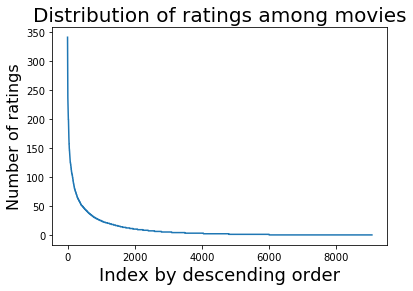

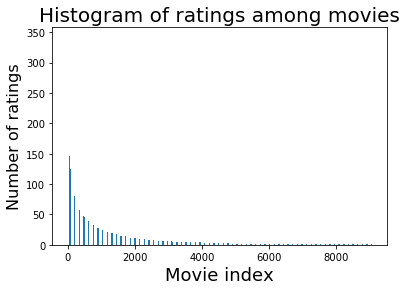

In [3]:
user_row, movie_col = R.shape

count_sum = [np.count_nonzero(R[:,movie]) for movie in range(movie_col)]
# print(count_sum)


movie_ids = np.arange(movie_col)
count_sum, movie_ids = zip(*sorted(zip(count_sum, movie_ids), reverse=True))

ax = plt.subplot(111)
width = 0.3

index = np.arange(len(movie_ids))
plt.plot(index, count_sum)
plt.title('Distribution of ratings among movies', fontsize=20)
plt.xlabel('Index by descending order', fontsize=18)
plt.ylabel('Number of ratings', fontsize=16)
plt.show()


ax = plt.subplot(111)
ax.bar(index, count_sum, width=width)
plt.title('Histogram of ratings among movies', fontsize=20)
plt.xlabel('Movie index', fontsize=18)
plt.ylabel('Number of ratings', fontsize=16)
plt.show()

# Problem 4: 

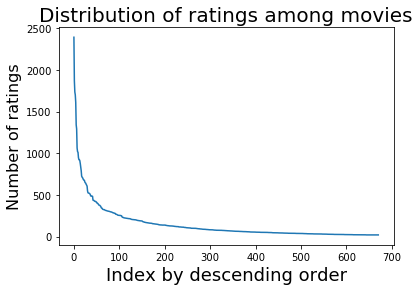

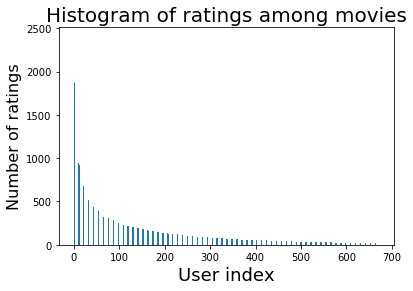

In [4]:
user_row, movie_col = R.shape

num_ratings_per_user = [np.count_nonzero(R[user,:]) for user in range(user_row)]
user_ids = np.arange(user_row)
num_ratings_per_user, user_ids = zip(*sorted(zip(num_ratings_per_user, user_ids), reverse=True))


width = 0.3
index = np.arange(len(user_ids))

plt.plot(index, num_ratings_per_user)
plt.title('Distribution of ratings among movies', fontsize=20)
plt.xlabel('Index by descending order', fontsize=18)
plt.ylabel('Number of ratings', fontsize=16)
plt.show()

ax = plt.subplot(111)
plt.title('Histogram of ratings among movies', fontsize=20)
plt.xlabel('User index', fontsize=18)
plt.ylabel('Number of ratings', fontsize=16)
ax.bar(index, num_ratings_per_user, width=width)

plt.show()

# Problem 5:

To-be-completed

# Problem 6:

(671, 9066)
(array([  8.09000000e+03,   5.66000000e+02,   1.77000000e+02,
         1.03000000e+02,   5.80000000e+01,   3.20000000e+01,
         1.40000000e+01,   1.30000000e+01,   8.00000000e+00]), array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]), <a list of 9 Patch objects>)


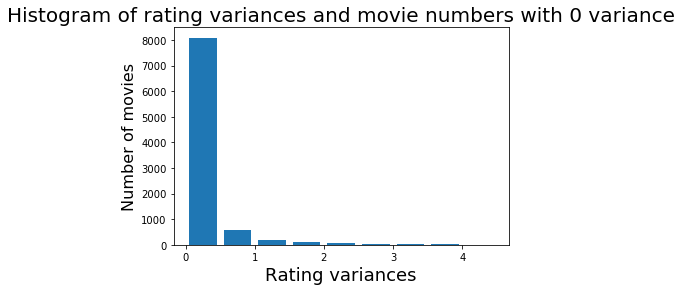

(array([ 1099.,   323.,   120.,    78.,    42.,    24.,    10.,    10.,
           8.]), array([ 0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,  4.25,  4.75]), <a list of 9 Patch objects>)


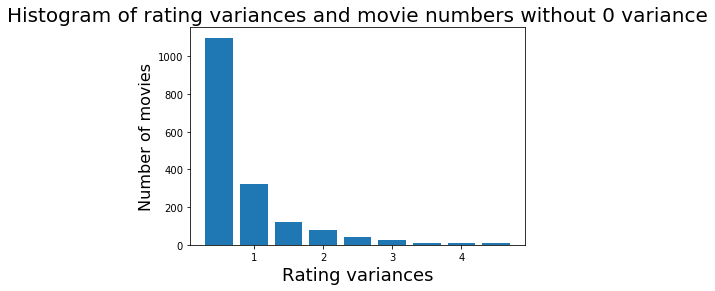

In [5]:
user_row, movie_col = R.shape
print(R.shape)
variance_each_movie = [np.var(R[:,movie]) for movie in range(movie_col)]

movie_ids = np.arange(movie_col)
variance_each_movie, movie_ids = zip(*sorted(zip(variance_each_movie, movie_ids), reverse=True))

ax_1 = plt.subplot(111)
index = np.arange(0.0, 5, 0.5)
ax_1 = plt.hist(variance_each_movie, bins = index, rwidth = 0.8)
print(ax_1)

plt.title('Histogram of rating variances and movie numbers with 0 variance', fontsize=20)
plt.xlabel('Rating variances', fontsize=18)
plt.ylabel('Number of movies', fontsize=16)

plt.show()

ax_2 = plt.subplot(111)
index_2 = np.arange(0.25, 5.25, 0.5)
ax_2 = plt.hist(variance_each_movie, bins = index_2, rwidth = 0.8)
print(ax_2)

plt.title('Histogram of rating variances and movie numbers without 0 variance', fontsize=20)
plt.xlabel('Rating variances', fontsize=18)
plt.ylabel('Number of movies', fontsize=16)

plt.show()

# Part 2:

# Problem 7:

No Coding

# Problem 8: 

No Coding

# Problem 9: 

No Coding

# Problem 10:

No Coding

# Problem 35: 

No Coding

# Problem 36: 

In [7]:
from surprise import Reader
from surprise import Dataset

reader = Reader(rating_scale=(1.0, 5.0))
data_small = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

from collections import defaultdict
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from surprise import Reader
from surprise import Dataset
from surprise import KNNBasic, KNNWithMeans, NMF, SVD
from surprise import accuracy
from surprise.model_selection import KFold

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    badUsers = 0
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # If some user in the test set has rated less than t items, then drop this user
        if len(user_ratings) < k:
            badUsers += 1
            continue
    
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        # If |G| = 0 for some user in the test set, then drop this user 
        if n_rel is 0:
            badUsers += 1
            continue

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1
    
    print("Filtered out %d" % badUsers)
    return precisions, recalls

ts = np.linspace(1, 25, num=25)
thres = 3
data = data_small
kf = KFold(n_splits=10)

avgPrecisions, avgRecalls = [], []
for t in ts:
    algo = KNNWithMeans(k=22, sim_options={'name': 'pearson_baseline'}) # minimal k = 22
    
    totalPrecisions, totalRecalls = 0.0, 0.0    
    for trainset, testset in kf.split(data):
        algo.fit(trainset)

        pred = algo.test(testset) 

        precisions, recalls = precision_recall_at_k(pred, k=int(t), threshold=thres)
        totalPrecisions += np.mean(list(precisions.values()))
        totalRecalls += np.mean(list(recalls.values()))
        
    avgPrecisions.append(totalPrecisions / 10.)
    avgRecalls.append(totalRecalls / 10.)
    
ax = plt.subplot(111)
width = 2

# plt.title("Avg Precision vs. t")
# plt.ylabel("Avg Precision")
# plt.xlabel("t")
# plt.plot(ts, avgPrecisions)
# plt.show()

# plt.title("Avg Recalls vs. t")
# plt.ylabel("Avg Recalls")
# plt.xlabel("t")
# plt.plot(ts, avgRecalls)
# plt.show()

# plt.title("Avg Precision vs. Avg Recall")
# plt.ylabel("Avg Precision")
# plt.xlabel("Avg Recall")
# plt.plot(avgRecalls, avgPrecisions)
# plt.show()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Filtered out 11
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Filtered out 4
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Filtered out 7
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Filtered out 12
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Filtered out 11
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Filtered out 13
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Filtered out 8
Estimating biases using als...
Computing the pearson_baseline similarity

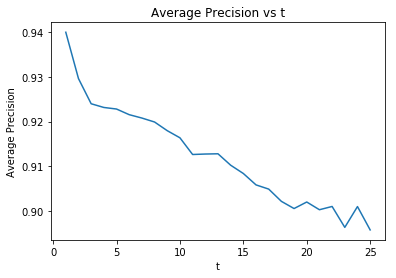

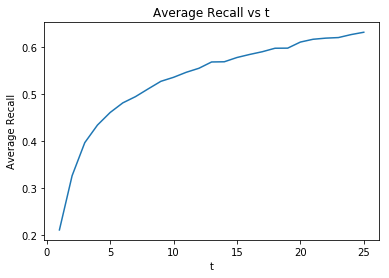

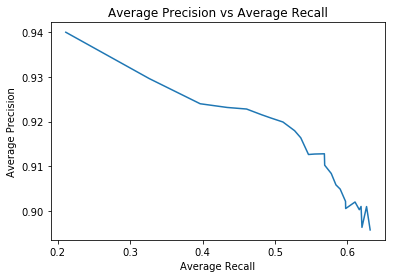

In [8]:
plt.title("Average Precision vs t")
plt.ylabel("Average Precision")
plt.xlabel("t")
plt.plot(ts, avgPrecisions)
plt.show()

plt.title("Average Recall vs t")
plt.ylabel("Average Recall")
plt.xlabel("t")
plt.plot(ts, avgRecalls)
plt.show()

plt.title("Average Precision vs Average Recall")
plt.ylabel("Average Precision")
plt.xlabel("Average Recall")
plt.plot(avgRecalls, avgPrecisions)
plt.show()

# Problem 37:

Filtered out 12
Filtered out 11
Filtered out 8
Filtered out 6
Filtered out 7
Filtered out 6
Filtered out 10
Filtered out 10
Filtered out 11
Filtered out 15
Filtered out 40
Filtered out 37
Filtered out 33
Filtered out 46
Filtered out 51
Filtered out 49
Filtered out 40
Filtered out 38
Filtered out 36
Filtered out 45
Filtered out 87
Filtered out 108
Filtered out 99
Filtered out 97
Filtered out 90
Filtered out 100
Filtered out 86
Filtered out 95
Filtered out 104
Filtered out 97
Filtered out 159
Filtered out 154
Filtered out 166
Filtered out 149
Filtered out 162
Filtered out 157
Filtered out 163
Filtered out 145
Filtered out 155
Filtered out 153
Filtered out 206
Filtered out 222
Filtered out 202
Filtered out 206
Filtered out 203
Filtered out 209
Filtered out 232
Filtered out 204
Filtered out 216
Filtered out 211
Filtered out 266
Filtered out 264
Filtered out 258
Filtered out 252
Filtered out 251
Filtered out 252
Filtered out 258
Filtered out 266
Filtered out 261
Filtered out 271
Filtered ou

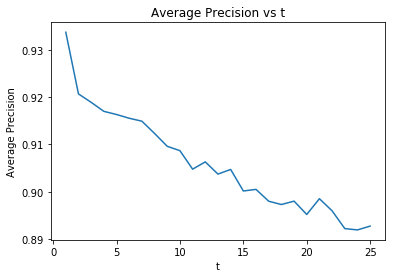

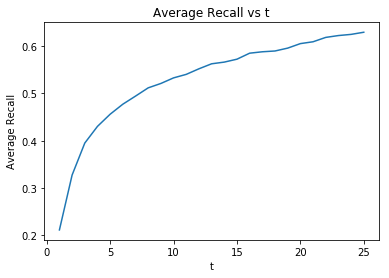

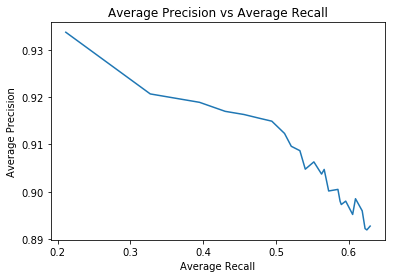

In [9]:
from surprise import KNNBasic, KNNWithMeans, NMF, SVD

ts = np.linspace(1, 25, num=25)
thres = 3
data = data_small
kf = KFold(n_splits=10)

avgPrecisions, avgRecalls = [], []
for t in ts:
    algo = NMF(n_factors=18)
    
    totalPrecisions, totalRecalls = 0.0, 0.0    
    for trainset, testset in kf.split(data):
        algo.fit(trainset)

        pred = algo.test(testset) 

        precisions, recalls = precision_recall_at_k(pred, k=int(t), threshold=thres)
        totalPrecisions += np.mean(list(precisions.values()))
        totalRecalls += np.mean(list(recalls.values()))
        
    avgPrecisions.append(totalPrecisions / 10.)
    avgRecalls.append(totalRecalls / 10.)
    
ax = plt.subplot(111)
width = 2

plt.title("Average Precision vs t")
plt.ylabel("Average Precision")
plt.xlabel("t")
plt.plot(ts, avgPrecisions)
plt.show()

plt.title("Average Recall vs t")
plt.ylabel("Average Recall")
plt.xlabel("t")
plt.plot(ts, avgRecalls)
plt.show()

plt.title("Average Precision vs Average Recall")
plt.ylabel("Average Precision")
plt.xlabel("Average Recall")
plt.plot(avgRecalls, avgPrecisions)
plt.show()

# Problem 38: 

Filtered out 15
Filtered out 13
Filtered out 7
Filtered out 5
Filtered out 8
Filtered out 8
Filtered out 7
Filtered out 12
Filtered out 16
Filtered out 12
Filtered out 38
Filtered out 45
Filtered out 44
Filtered out 46
Filtered out 45
Filtered out 46
Filtered out 45
Filtered out 39
Filtered out 44
Filtered out 38
Filtered out 81
Filtered out 90
Filtered out 111
Filtered out 93
Filtered out 89
Filtered out 86
Filtered out 110
Filtered out 96
Filtered out 104
Filtered out 97
Filtered out 154
Filtered out 160
Filtered out 161
Filtered out 171
Filtered out 143
Filtered out 145
Filtered out 153
Filtered out 160
Filtered out 157
Filtered out 152
Filtered out 223
Filtered out 198
Filtered out 218
Filtered out 205
Filtered out 210
Filtered out 213
Filtered out 223
Filtered out 205
Filtered out 225
Filtered out 199
Filtered out 257
Filtered out 250
Filtered out 256
Filtered out 282
Filtered out 267
Filtered out 267
Filtered out 265
Filtered out 248
Filtered out 269
Filtered out 252
Filtered out

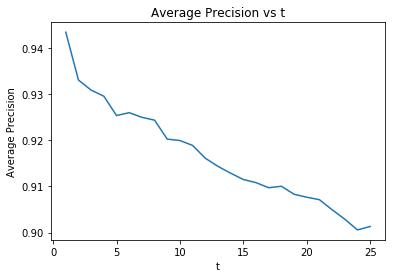

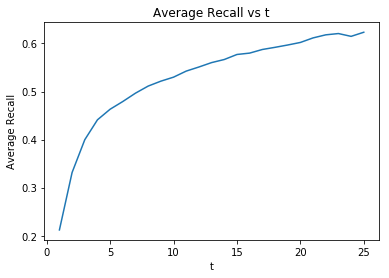

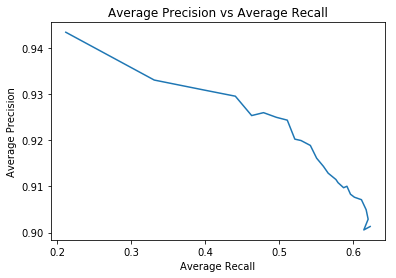

In [11]:
ts = np.linspace(1, 25, num=25)
thres = 3
data = data_small
kf = KFold(n_splits=10)

avgPrecisions, avgRecalls = [], []
for t in ts:
    algo = SVD(n_factors=20)
    
    totalPrecisions, totalRecalls = 0.0, 0.0    
    for trainset, testset in kf.split(data):
        algo.fit(trainset)

        pred = algo.test(testset) 

        precisions, recalls = precision_recall_at_k(pred, k=int(t), threshold=thres)
        totalPrecisions += np.mean(list(precisions.values()))
        totalRecalls += np.mean(list(recalls.values()))
        
    avgPrecisions.append(totalPrecisions / 10.)
    avgRecalls.append(totalRecalls / 10.)
    
ax = plt.subplot(111)
width = 2

plt.title("Average Precision vs t")
plt.ylabel("Average Precision")
plt.xlabel("t")
plt.plot(ts, avgPrecisions)
plt.show()

plt.title("Average Recall vs t")
plt.ylabel("Average Recall")
plt.xlabel("t")
plt.plot(ts, avgRecalls)
plt.show()

plt.title("Average Precision vs Average Recall")
plt.ylabel("Average Precision")
plt.xlabel("Average Recall")
plt.plot(avgRecalls, avgPrecisions)
plt.show()

# Problem 39:

In [12]:
def getUR(testset):
    o = {}
    for u, i, r in testset:
        if int(i) in o:
            o[int(u)].append((int(i), r))
        else:
            o[int(u)] = [(int(i), r)]
    return o

def buildItemVar(trainset, testsetir):
    o = {}
    for k, v in trainset.ir.items():
        o[k] = [r for u, r in v]
    for k, v in testsetir.items():
        if k in o:
            for u, r in v:
                o[k].append(r)
        else:
            o[k] = [r for u, r in v]
    return o

def filterTestset(trainset, testset, threshold=3):
    testsetur = getUR(testset)
    blacklist = {}
    for k, v in testsetur.items():
        n_rel = sum((true_r >= threshold) for _, true_r in v)
        if n_rel == 0: # G == 0
            blacklist[k] = True

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


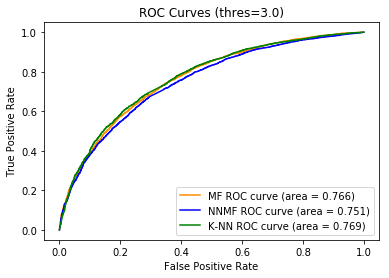

In [13]:
from sklearn import metrics
from surprise import KNNBasic, KNNWithMeans, NMF, SVD
from surprise import accuracy
from surprise.model_selection import KFold

thres = 3

data = data_small
kf = KFold(n_splits=10) # 90% for training and 10% for testing
trainset, testset = None, None
for train, test in kf.split(data): # just use the first split since we're not cross validating  (are we?)
    trainset, testset = train, test
    break
    
algo = SVD(n_factors=20)
algo.fit(trainset)
pred = algo.test(testset)

y_true, y_pred = [], []
for u, i, r_real, r_pred, misc in pred:
    y_true.append(thres < r_real)
    y_pred.append(r_pred)

fpr, tpr, _ = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=1)
plt.plot(fpr, tpr, color='darkorange', label='MF ROC curve (area = %0.3f)' % metrics.roc_auc_score(y_true=y_true, y_score=y_pred))

algo = NMF(n_factors=18)
algo.fit(trainset)
pred = algo.test(testset)

y_true, y_pred = [], []
for u, i, r_real, r_pred, misc in pred:
    y_true.append(thres < r_real)
    y_pred.append(r_pred)
    
fpr, tpr, _ = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=1)
plt.plot(fpr, tpr, color='blue', label='NNMF ROC curve (area = %0.3f)' % metrics.roc_auc_score(y_true=y_true, y_score=y_pred))

algo = KNNWithMeans(k=22, sim_options={'name': 'pearson_baseline'}) # minimal k = 22
algo.fit(trainset)
pred = algo.test(testset)

y_true, y_pred = [], []
for u, i, r_real, r_pred, misc in pred:
    y_true.append(thres < r_real)
    y_pred.append(r_pred)

fpr, tpr, _ = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=1)
plt.plot(fpr, tpr, color='green', label='K-NN ROC curve (area = %0.3f)' % metrics.roc_auc_score(y_true=y_true, y_score=y_pred))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (thres=%.1f)' % thres)
plt.legend(loc="lower right")

plt.show()